# Tesco Locations

Cillian Berragan  
2023-10-18

The following document demonstrates the ability to easily query the
cleaned UK dataset for Tesco shop locations.

## Analysis

First we import the required libraries:

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

We then read in the dataset using `geopandas` and print the first 5
rows:

In [2]:
columns = ["names_value", "category_main", "brand_name_value", "geometry"]

df = gpd.read_parquet("./data/processed/uk_places_admin.parquet", columns=columns)
df.head()

The following code block prints the total number of points that are
classified as part of the ‘Tesco’ brand:

In [3]:
tesco = df.loc[df["brand_name_value"] == "Tesco"]
len(tesco)

2717

We then plot these points, colouring by the name of each location:

> **NOTE:** The Local Authority Boundaries for the United Kingdom is
> available
> [here](https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-may-2023-boundaries-uk-buc/explore).

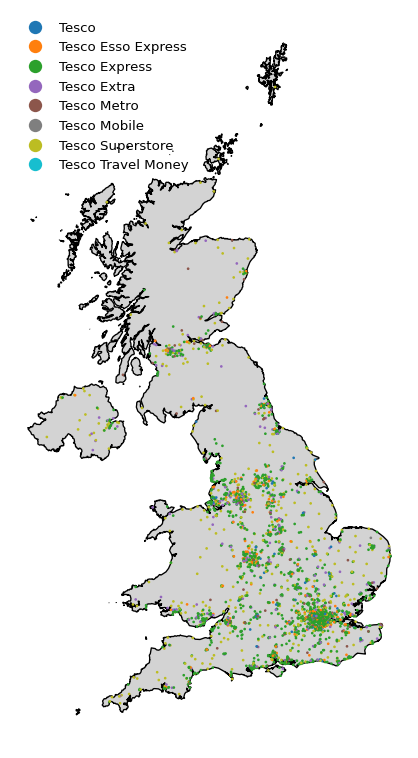

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))


lad = gpd.GeoSeries(gpd.read_file("~/data/LAD_BUC_2022.gpkg").unary_union, crs=27700)

gpd.GeoSeries(lad).plot(facecolor="lightgrey", edgecolor="black", ax=ax)
tesco.plot(
    "names_value",
    ax=ax,
    legend=True,
    legend_kwds={"frameon": False},
    markersize=1,
)

ax.axis("off")
plt.show()